Mackenzie Butler, 11-19-24, Analysis Report

I chose the Album "Invitation to Her's" by the band Her's and the album "Jinx" by the band Crumb. These are 2 of my favorite albums for different reasons. The Her's album has a more pop vibe and crumb is more of a psychedelic Jazz album which being differnt I thin would be cool to compare. These are two of my favorite bands and albums and both make such great music.

In [22]:
import urllib
import json
import pandas as pd
import requests
import base64
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID+':'+SessionKey).encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}
    response = requests.post(url, data = data, headers=header)
    print(response.status_code)
    return response.json()['access_token']

In [3]:
keys = pd.read_csv(r"C:\Users\mackb\Data in EMAT\Spotify_Keys.txt")

In [4]:
access_token = get_session_token(keys['Client_ID'].iloc[0],keys['Client_Secret'].iloc[0])

200


In [5]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
track_ep = 'https://api.spotify.com/v1/tracks'
ab_track_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [6]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [7]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [8]:
h_album_id = '3w5PWzbOdhuHd2oTynfBJw'
c_album_id = '6DxidEI7EhF8md8ev83iNY'

This is just getting all the baseline stuff to be able to use the Spotify API. H album is the Her's album Welcome to Her's and C album is the Crumb Album Jinx

In [12]:
ab_track_ep.format(h_album_id)
ab_track_ep.format(c_album_id)

'https://api.spotify.com/v1/albums/6DxidEI7EhF8md8ev83iNY/tracks'

In [13]:
h_album_response = api_call(ab_track_ep.format(h_album_id), session_header)
c_album_response = api_call(ab_track_ep.format(c_album_id), session_header)

200
200


In [14]:
h_album_response.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [15]:
h_album_df = pd.DataFrame(h_album_response['items'])
c_album_df = pd.DataFrame(c_album_response['items'])

In [16]:
h_track_ids = ','.join(h_album_df['id'].to_list())
c_track_ids = ','.join(c_album_df['id'].to_list())

In [17]:
h_track_features = api_call(t_features_ep + '?ids={}'.format(h_track_ids), session_header)
c_track_features = api_call(t_features_ep + '?ids={}'.format(c_track_ids), session_header)

200
200


In [18]:
h_track_features.keys()
c_track_features.keys()

dict_keys(['audio_features'])

In [19]:
h_track_df = pd.DataFrame(h_track_features['audio_features'])
h_track_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.588,0.855,9,-6.153,1,0.0372,0.073500,0.815,0.128,0.717,141.941,audio_features,1zFbBrZmJr1Z49HYe84dBg,spotify:track:1zFbBrZmJr1Z49HYe84dBg,https://api.spotify.com/v1/tracks/1zFbBrZmJr1Z...,https://api.spotify.com/v1/audio-analysis/1zFb...,211165,4
1,0.561,0.790,5,-4.938,1,0.0301,0.000053,0.825,0.257,0.712,150.046,audio_features,5GOVjC32dV7jhi23SbeyWs,spotify:track:5GOVjC32dV7jhi23SbeyWs,https://api.spotify.com/v1/tracks/5GOVjC32dV7j...,https://api.spotify.com/v1/audio-analysis/5GOV...,220377,4
2,0.639,0.859,4,-4.569,1,0.0302,0.002710,0.541,0.149,0.687,89.987,audio_features,7KO4XNfwEKhTbSGo3O6qX5,spotify:track:7KO4XNfwEKhTbSGo3O6qX5,https://api.spotify.com/v1/tracks/7KO4XNfwEKhT...,https://api.spotify.com/v1/audio-analysis/7KO4...,200456,4
3,0.547,0.559,6,-6.079,0,0.0270,0.020200,0.462,0.117,0.538,136.948,audio_features,2l7vMv0FwKb7S1OZMkJRP1,spotify:track:2l7vMv0FwKb7S1OZMkJRP1,https://api.spotify.com/v1/tracks/2l7vMv0FwKb7...,https://api.spotify.com/v1/audio-analysis/2l7v...,281321,4
4,0.636,0.893,5,-4.579,1,0.0482,0.001990,0.830,0.107,0.569,139.970,audio_features,7iDeRCT8iKSQGzgeqjYezp,spotify:track:7iDeRCT8iKSQGzgeqjYezp,https://api.spotify.com/v1/tracks/7iDeRCT8iKSQ...,https://api.spotify.com/v1/audio-analysis/7iDe...,268835,4


In [20]:
c_track_df = pd.DataFrame(c_track_features['audio_features'])
c_track_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.635,0.385,6,-11.621,1,0.0341,0.390,0.783,0.0993,0.117,121.951,audio_features,3VwgtTh9D0CubY32jdhI5U,spotify:track:3VwgtTh9D0CubY32jdhI5U,https://api.spotify.com/v1/tracks/3VwgtTh9D0Cu...,https://api.spotify.com/v1/audio-analysis/3Vwg...,111987,4
1,0.580,0.797,11,-9.689,0,0.0443,0.653,0.762,0.0875,0.596,79.890,audio_features,3U3uvOHNxa3ODEiD9H6oVr,spotify:track:3U3uvOHNxa3ODEiD9H6oVr,https://api.spotify.com/v1/tracks/3U3uvOHNxa3O...,https://api.spotify.com/v1/audio-analysis/3U3u...,200280,4
2,0.665,0.351,2,-9.424,1,0.0276,0.516,0.819,0.1090,0.451,87.057,audio_features,0R3TWpoxAhT3HDXM7tpRzS,spotify:track:0R3TWpoxAhT3HDXM7tpRzS,https://api.spotify.com/v1/tracks/0R3TWpoxAhT3...,https://api.spotify.com/v1/audio-analysis/0R3T...,126120,4
3,0.713,0.529,7,-8.681,1,0.0286,0.482,0.900,0.1950,0.625,120.021,audio_features,0H2zA6m04MUsu4mX2KecNr,spotify:track:0H2zA6m04MUsu4mX2KecNr,https://api.spotify.com/v1/tracks/0H2zA6m04MUs...,https://api.spotify.com/v1/audio-analysis/0H2z...,173000,4
4,0.319,0.436,8,-10.003,1,0.0313,0.798,0.942,0.1260,0.306,139.135,audio_features,31T93onltAjRxJ6I8MqsHT,spotify:track:31T93onltAjRxJ6I8MqsHT,https://api.spotify.com/v1/tracks/31T93onltAjR...,https://api.spotify.com/v1/audio-analysis/31T9...,217853,4


I got to this point so that I could see all the possible audio features I could graph and compare

I feel the category Dancibilty would best fit Her's because they have songs that would be fun to dance to, as well as slow dance to. Energy would best fit Crumb because they have more low energy songs, but some are more up beat too.

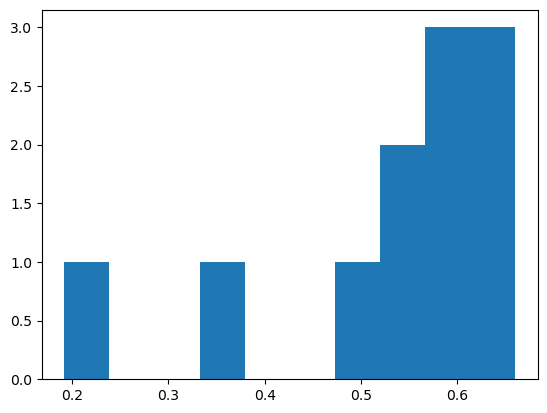

In [24]:
fig1, ax1 = plt.subplots()
ax1.hist(h_track_df['danceability'])
plt.show()

Most songs on the album have a high dancibilty a few two skewed off to the left, so for the most part this album has a higher dancibility

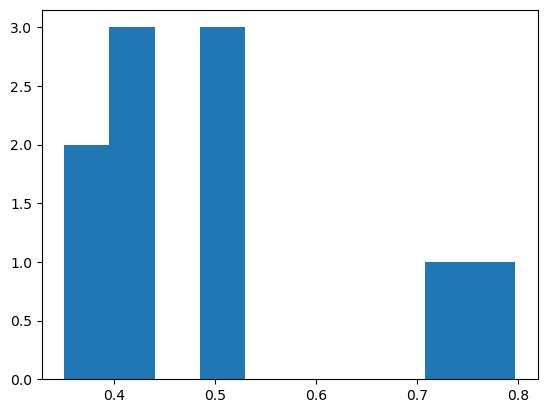

In [29]:
fig2, ax2 = plt.subplots()
ax2.hist(c_track_df['energy'])
plt.show()

Most songs have a low energy with a few being skewed farther right, so for the most part this album is low energy

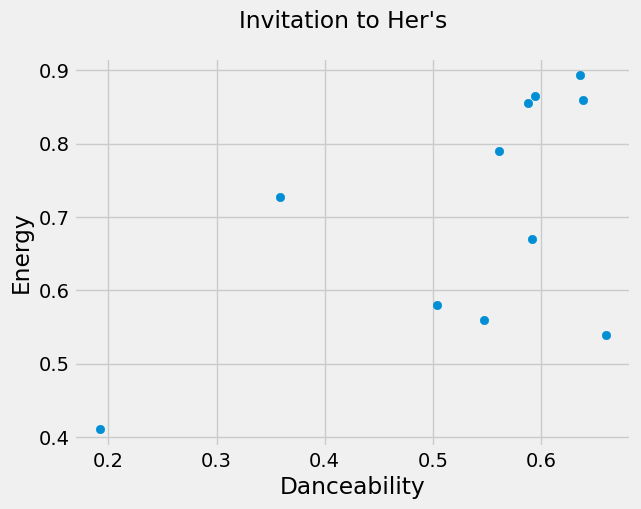

In [39]:
fig3, ax3 = plt.subplots()

ax3.scatter(h_track_df['danceability'],h_track_df['energy'])
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Energy")
fig3.suptitle("Invitation to Her's")
plt.style.use('fivethirtyeight')

plt.show()

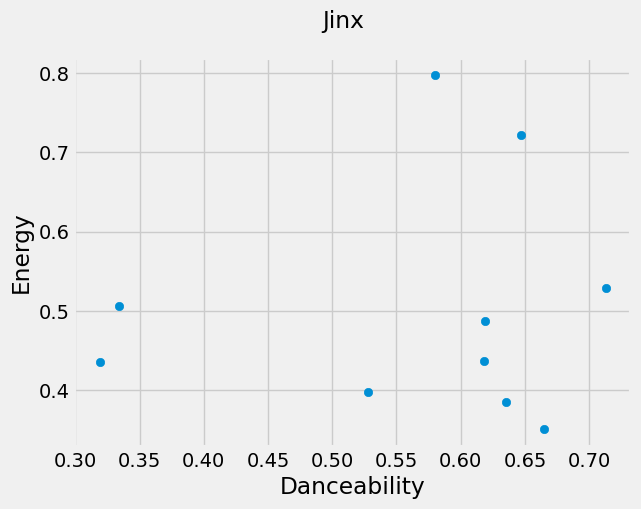

In [38]:
fig4, ax4 = plt.subplots()

ax4.scatter(c_track_df['danceability'],c_track_df['energy'])
ax4.set_xlabel("Danceability")
ax4.set_ylabel("Energy")
fig4.suptitle("Jinx")
plt.style.use('fivethirtyeight')
plt.show()

These Scatter plots compare the danceability and energry within each album

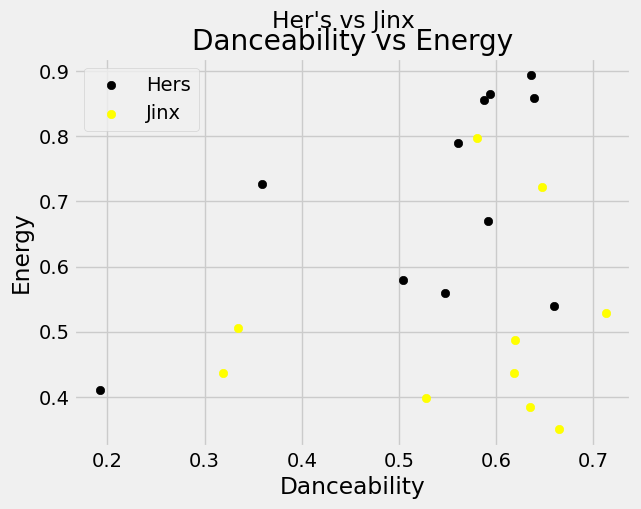

In [54]:
fig5, ax5 = plt.subplots()

h_scatter = ax5.scatter(h_track_df['danceability'], h_track_df['energy'], color = 'black', label ='Hers')
c_scatter = ax5.scatter(c_track_df['danceability'], c_track_df['energy'], color = 'yellow', label = 'Jinx')
ax5.set_xlabel("Danceability")
fig5.suptitle("Her's vs Jinx")
ax5.set_ylabel("Energy")
ax5.set_title('Danceability vs Energy')
plt.style.use('fivethirtyeight')
plt.legend(handles = [h_scatter, c_scatter])
plt.show()

We can see that both Albums have a mojority of high dancibility while a couple skew left. Her's' energy tends to stay towards the higher end with few on the lower end, while Crumb's stays towards the lower end but still has some that is higher energy.

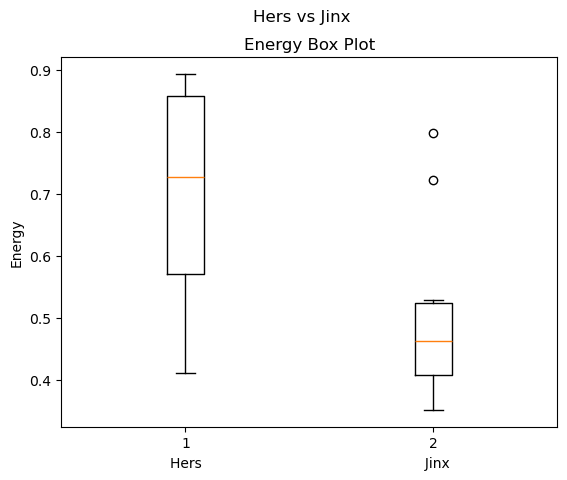

In [95]:
h_st = h_track_df['energy']
c_st = c_track_df['energy']

fig6, ax6 = plt.subplots()
plt.style.use('default')
ax6.boxplot([h_st, c_st])
ax6.set_ylabel("Energy")
ax6.set_xlabel("Hers                                                   Jinx")
ax6.set_title('Energy Box Plot')
fig6.suptitle('Hers vs Jinx')
plt.show()

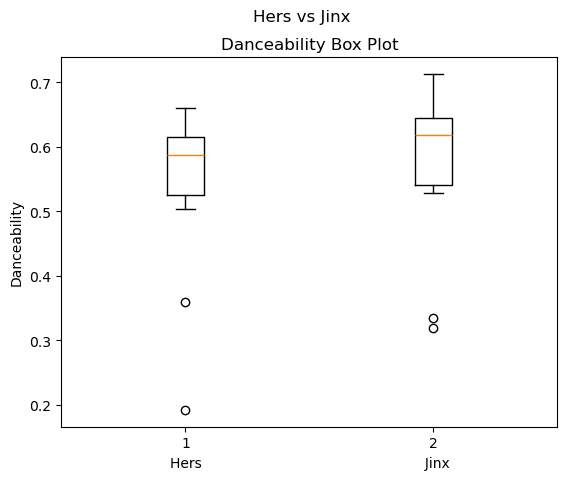

In [96]:
h_st = h_track_df['danceability']
c_st = c_track_df['danceability']

fig6, ax6 = plt.subplots()
plt.style.use('default')
ax6.boxplot([h_st, c_st])
ax6.set_ylabel("Danceability")
ax6.set_xlabel("Hers                                                   Jinx")
ax6.set_title('Danceability Box Plot')
fig6.suptitle('Hers vs Jinx')
plt.show()

Overall we can see a big difference between albums when it comes to energy, Her's being more high energy and Crumb being more low energy. When it comes to dancibility they are more similar with having majority higher danceability.

In [ ]:
|